In [1]:
import pandas as pd
import numpy as np

##Importing Data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [3]:
labels = pd.read_csv('labels.csv')
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


##Data Exploration and Cleaning

In [5]:
print(df.shape)

(801, 20532)


<Axes: >

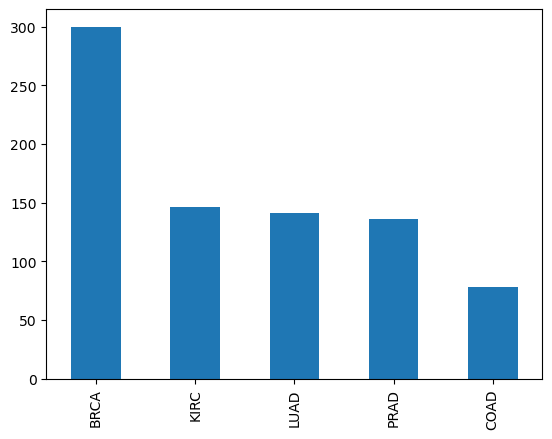

In [6]:
labels['Class'].value_counts().plot.bar()

##Data preprocessing

In [7]:
X = df.iloc[:,1:]
y = labels.iloc[:,1]

In [8]:
X.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [9]:
y.head()

0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
Name: Class, dtype: object

In [10]:
y.shape

(801,)

In [11]:
X.shape

(801, 20531)

In [12]:
#Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

In [13]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)

In [14]:
label = label_encoder.classes_
classes = np.unique(y_encoded)

In [15]:
label

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [16]:
classes

array([0, 1, 2, 3, 4])

In [17]:
#Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [18]:
df.iloc[:,1:].describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [19]:
#data scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_test_norm = min_max_scaler.fit_transform(X_test)

In [20]:
X_train.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
616,0.0,5.257467,3.658154,7.475920,10.532229,0.0,6.581443,0.000000,0.0,0.0,...,5.898494,9.431353,10.331006,8.580372,10.036847,11.432338,10.221418,11.005996,5.364131,0.0
329,0.0,3.972858,3.368908,6.644179,9.361722,0.0,8.306344,0.431142,0.0,0.0,...,6.431859,9.140965,10.624622,4.984161,9.985159,12.167415,10.983450,9.210472,10.333625,0.0
342,0.0,3.571592,3.900113,6.351773,9.740098,0.0,8.413133,0.427284,0.0,0.0,...,6.270166,9.507777,9.456317,7.227991,9.542202,11.353886,10.655405,9.469707,8.015928,0.0
394,0.0,3.835964,4.914249,6.419020,9.200234,0.0,7.591784,0.629939,0.0,0.0,...,6.871314,9.930158,10.783563,2.099363,10.293610,12.520019,11.092585,9.215594,3.764824,0.0
79,0.0,3.219029,2.284781,8.124178,10.386132,0.0,5.780310,0.521252,0.0,0.0,...,4.235850,8.706959,9.637483,0.521252,9.059715,12.218963,10.892148,9.083054,3.460572,0.0


In [21]:
X_train.iloc[:,1:].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,640.000000,640.000000,640.000000,640.000000,640.0,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,2.983552,3.068122,6.699304,9.821841,0.0,7.387252,0.507593,0.013642,0.011573,0.699814,...,5.892689,8.770352,10.052003,4.832174,9.732638,11.750710,10.148189,9.577718,5.540895,0.094200
std,1.191944,1.060773,0.626395,0.506001,0.0,1.116145,0.511235,0.118309,0.187104,1.205699,...,0.754894,0.616277,0.371907,2.407403,0.532844,0.656329,0.592314,0.556335,2.058319,0.358519
min,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.261989,7.530141,7.864533,0.593975,0.000000
25%,2.261718,2.388503,6.292346,9.476645,0.0,6.633593,0.000000,0.000000,0.000000,0.000000,...,5.448096,8.386594,9.810576,3.114893,9.399748,11.324906,9.805008,9.242811,4.149891,0.000000
50%,3.107318,3.064909,6.639200,9.803022,0.0,7.442632,0.446625,0.000000,0.000000,0.357945,...,5.967645,8.775426,10.070610,5.471659,9.789386,11.745826,10.177488,9.553222,5.238419,0.000000
75%,3.849071,3.721206,7.031729,10.143715,0.0,8.114385,0.804424,0.000000,0.000000,0.935211,...,6.418616,9.152851,10.287571,6.620132,10.073337,12.174066,10.582883,9.894627,6.868196,0.000000
max,6.237034,6.063484,9.173387,11.355621,0.0,10.696255,2.779008,1.554834,4.067604,12.293023,...,7.771054,11.105431,11.318243,9.139459,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [22]:
X_train_norm

array([[0.        , 0.84294346, 0.60330903, ..., 0.63479461, 0.44951174,
        0.        ],
       [0.        , 0.63697874, 0.55560603, ..., 0.27197346, 0.91780791,
        0.        ],
       [0.        , 0.57264268, 0.6432133 , ..., 0.32435705, 0.69940163,
        0.        ],
       ...,
       [0.        , 0.4053844 , 0.43214513, ..., 0.28595653, 0.33884298,
        0.        ],
       [0.        , 0.66284652, 0.61393885, ..., 0.43626284, 0.54634472,
        0.        ],
       [0.        , 0.47947197, 0.41021926, ..., 0.46712759, 0.59814325,
        0.        ]])

##Feature Selection 

In [23]:
#Mutual Information
from sklearn.feature_selection import mutual_info_classif
MI = mutual_info_classif(X_train_norm, y_train)

In [24]:
n_features = 4000
selected_scores_indices = np.argsort(MI)[::-1][0:n_features]

In [25]:
X_train_selected = X_train_norm[:, selected_scores_indices]
X_test_selected = X_test_norm[:,selected_scores_indices]

In [26]:
X_train_selected.shape

(640, 4000)

In [27]:
X_train_selected.shape

(640, 4000)

##Classification

In [28]:
#Model training
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
RF = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
model = RF.fit(X_train_selected, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_features=0.2))

In [30]:
y_pred = RF.predict(X_test_selected)


In [31]:
pred_probabilty = RF.predict_proba(X_test_selected)

##Model Evaluation 
accuracy
precision
recall
f1 score
confusion matrix
ROC curve

In [32]:

from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [33]:
#accuracy
accuracy = np.round(balanced_accuracy_score(y_test, y_pred),4)
accuracy

1.0

In [34]:
#precision
precision = precision_score(y_test, y_pred, average = 'weighted')

In [35]:
precision

1.0

In [36]:
recall = recall_score(y_test, y_pred, average = 'weighted')
recall

1.0

In [37]:
f1 = f1_score(y_test, y_pred, average = 'weighted')
f1

1.0

In [38]:
report = classification_report(y_test, y_pred, target_names = label)
print("\n")
print("classification report\n\n")
print(report)



classification report


              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        61
        COAD       1.00      1.00      1.00        17
        KIRC       1.00      1.00      1.00        25
        LUAD       1.00      1.00      1.00        29
        PRAD       1.00      1.00      1.00        29

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



In [39]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = label, columns=label)
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,61,0,0,0,0
COAD,0,17,0,0,0
KIRC,0,0,25,0,0
LUAD,0,0,0,29,0
PRAD,0,0,0,0,29


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(50.722222222222214, 0.5, 'True Labels')

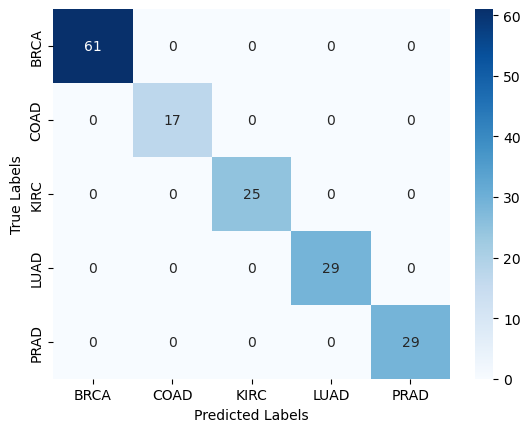

In [41]:
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [42]:
from sklearn.preprocessing import label_binarize
y_test_binarised = label_binarize(y_test, classes = classes)

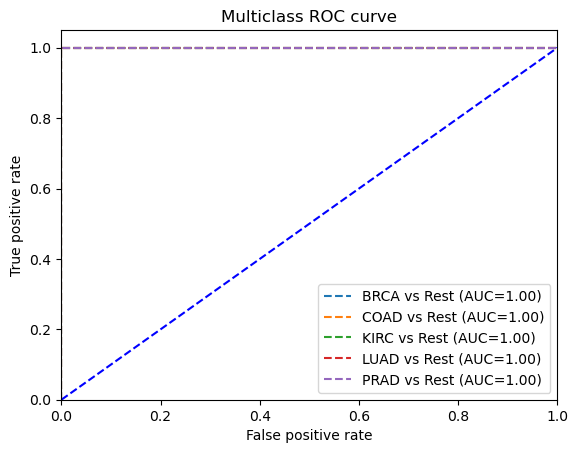

In [43]:
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_classes = classes.shape[0]

for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarised[:,i], pred_probabilty[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    #plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
            label='%s vs Rest (AUC=%0.2f)'%(label[i], roc_auc[i]))
    
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
.pkl | pickle